In [148]:
import numpy as np
import matplotlib.pyplot as plt

In [149]:
dt = 0.5
F = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 0, 0 ],
              [0, 0, 0, 0 ]])
G = np.array([[dt, 0],
              [0, dt],
              [1, 0],
              [0, 1]])

H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])
dim_x = 4
dim_y = 2

P0_0 = np.zeros(dim_x)
x0_0 = np.array([[100],[200],[0],[0]])
Q = np.eye(dim_x)
R = np.eye(dim_y)

u = np.array([[[3],[0]], [[0],[2]], [[5],[-1]]])
y = np.array([[[0],[0]], [[101],[201]], [[101],[202]], [[103],[201]]])

In [154]:
# predict, n = 0
x1_0 = F@x0_0 + G@u[0]
P1_0 = F@P0_0@F.T + Q

# correct, n = 1
K1 = P1_0@H.T@np.linalg.inv(H@P1_0.T@H.T + R)
x1_1 = x1_0 + K1@(y[1]-H@x1_0)
P1_1 = (np.eye(4)-K1@H)@P1_0@(np.eye(4)-K1@H).T + K1@R@K1.T

[[101.5]
 [200. ]
 [  3. ]
 [  0. ]]


In [151]:
# predict, n = 1
x2_1 = F@x1_1 + G@u[1]
P2_1 = F@P1_1@F.T + Q

# correct, n = 2
K2 = P2_1@H.T@np.linalg.inv(H@P2_1.T@H.T + R)
x2_2 = x2_1 + K2@(y[2]-H@x2_1)
P2_2 = (np.eye(4)-K2@H)@P2_1@(np.eye(4)-K2@H).T + K2@R@K2.T

In [155]:
# predict, n = 2
x3_2 = F@x2_2 + G@u[2]
P3_2 = F@P2_2@F.T + Q

# correct, n = 3
K3 = P3_2@H.T@np.linalg.inv(H@P3_2.T@H.T + R)
x3_3 = x3_2 + K3@(y[3]-H@x3_2)
P3_3 = (np.eye(4)-K3@H)@P3_2@(np.eye(4)-K3@H).T + K3@R@K3.T
x3_3


array([[103.33314318],
       [201.30119795],
       [  5.        ],
       [ -1.        ]])

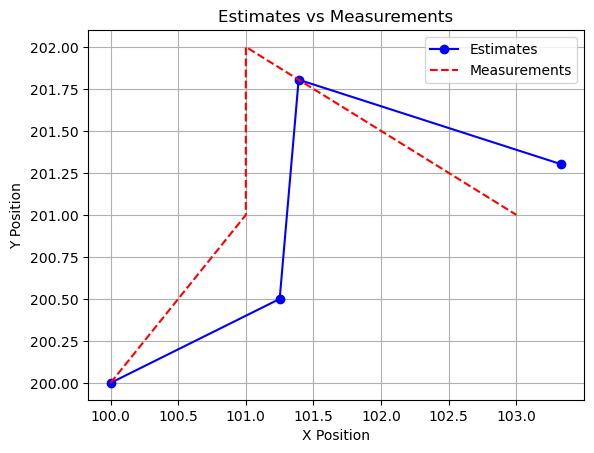

In [153]:

estimates = np.asarray([x0_0[:2], x1_1[:2], x2_2[:2], x3_3[:2]])
measurements = np.asarray([x0_0[:2], y[1][:2], y[2][:2], y[3][:2]])

x_est = estimates[:,0]
y_est = estimates[:,1]

x_meas = measurements[:,0]
y_meas = measurements[:,1]

# Plotting the paths
plt.plot(x_est, y_est, '-o', label='Estimates', color='blue')
plt.plot(x_meas, y_meas, '--', label='Measurements', color='red')

plt.legend()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Estimates vs Measurements")
plt.grid(True)
plt.show()
